<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 7.1: Decision Trees

INSTRUCTIONS:

- Read the guides and hints then create the necessary analysis and code to find and answer and conclusion for the scenario below.
- The baseline results (minimum) are:
    - **Accuracy** = 0.6895
    - **ROC AUC**  = 0.5690
- Try to achieve better results!

# Foreword
It is common that companies and professionals start with the data immediately available. Although this approach works, ideally the first step is to idenfy the problem or question and only then identify and obtain the set of data that can help to solve or answer the problem.

Also, given the current abundance of data, processing power and some particular machine learning methods, there could be a temptation to use ALL the data available. **Quality** is _**better**_ then **Quantity**!

Part of calling this discipline **Data Science** is that it is supposed to follow a process and not reach conclusions without support from evidence.

Moreover, it is a creative, exploratory, labour and iteractive processes. It is part of the process to repeat, review and change when finding a dead-end.

# Step 1: Define the problem or question
Identify the subject matter and the given or obvious questions that would be relevant in the field.

**Whether or not an individual will donate blood**

## Potential Questions
List the given or obvious questions.

**How to classify blood donors using the data we have**

**Does the number of blood donation matters in whether a donor will donate blood**

**Does the amount of blood donated matters?**

**Does recency matter in classifying whether or not a donor will donate blood**

## Actual Question
Choose the **one** question that should be answered.

**How to classify blood donors using the data we have**


# Step 2: Find the Data
### Blood Transfusion Service Center DataSet
- **Abstract**: Data taken from the **Blood Transfusion Service Center** in Hsin-Chu City in Taiwan.
- Date Donated: 2008-10-03
- Source:
        Original Owner and Donor: Prof. I-Cheng Yeh 
        Department of Information Management 
        Chung-Hua University, 
        Hsin Chu, Taiwan 30067, R.O.C. 

- Citation Request:
    **NOTE**: Reuse of this database is unlimited with retention of copyright notice for Prof. I-Cheng Yeh and the following published paper: 

        Yeh, I-Cheng, Yang, King-Jang, and Ting, Tao-Ming, "Knowledge discovery on RFM model using Bernoulli sequence, "Expert Systems with Applications, 2008
        
### UCI - Machine Learning Repository
- Center for Machine Learning and Intelligent Systems

The [**UCI Machine Learning Repository**](http://archive.ics.uci.edu/ml/about.html) is a collection of databases, domain theories, and data generators that are used by the machine learning community for the empirical analysis of machine learning algorithms.

In [1]:
# Find the dataset described above 
# Hint: search for it through the UCI Machine Learning Repository

# Step 3: Read the Data
- Read the data
- Perform some basic structural cleaning to facilitate the work

In [2]:
# Import libraries
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import normalize

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
from sklearn import tree

In [3]:
# Read data in pandas
df = pd.read_csv('transfusion.data', delimiter =",")
# Check data has loaded correctly

df

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
...,...,...,...,...,...
743,23,2,500,38,0
744,21,2,500,52,0
745,23,3,750,62,0
746,39,1,250,39,0


# Step 4: Explore and Clean the Data
- Perform some initial simple **EDA** (Exploratory Data Analysis)
- Check for
    - **Number of features**
    - **Data types**
    - **Domains, Intervals** - Possible unique values of each feature
    - **Outliers** (are they valid or expurious data [read or measure errors])
    - **Null** (values not present or coded [as zero of empty strings])
    - **Missing Values** (coded [as zero of empty strings] or values not present)
    - **Coded content** (classes identified by numbers or codes to represent absence of data)

In [4]:
# Perform EDA by investigating each of the points above 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   Recency (months)                            748 non-null    int64
 1   Frequency (times)                           748 non-null    int64
 2   Monetary (c.c. blood)                       748 non-null    int64
 3   Time (months)                               748 non-null    int64
 4   whether he/she donated blood in March 2007  748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


In [6]:
df.isnull().any()

Recency (months)                              False
Frequency (times)                             False
Monetary (c.c. blood)                         False
Time (months)                                 False
whether he/she donated blood in March 2007    False
dtype: bool

In [7]:
for col in df:
    print(f'this {col} have a unique features of {df[col].unique()} values. \n')

this Recency (months) have a unique features of [ 2  0  1  4  5  9  3 12  6 11 10 13  8 14  7 16 15 23 21 18 22 26 35 38
 40 74 20 17 25 39 72] values. 

this Frequency (times) have a unique features of [50 13 16 20 24  4  7 12  9 46 23  3 10  6  5 14 15 11  8  2 19 17  1 22
 18 38 43 34 44 26 41 21 33] values. 

this Monetary (c.c. blood) have a unique features of [12500  3250  4000  5000  6000  1000  1750  3000  2250 11500  5750   750
  2500  1500  1250  3500  3750  2750  2000   500  4750  4250   250  5500
  4500  9500 10750  8500 11000  6500 10250  5250  8250] values. 

this Time (months) have a unique features of [98 28 35 45 77  4 14 22 58 47 15 11 48 49 16 40 34 21 26 64 57 53 69 36
  2 46 52 81 29  9 74 25 51 71 23 86 38 76 70 59 82 61 79 41 33 10 95 88
 19 37 39 78 42 27 24 63 43 75 73 50 60 17 72 62 30 31 65 89 87 93 83 32
 12 18 55  3 13 54] values. 

this whether he/she donated blood in March 2007 have a unique features of [1 0] values. 



In [8]:
df.describe()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086,0.237968
std,8.095396,5.839307,1459.826781,24.376714,0.426124
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.750000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,50.000000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


In [9]:
#Rename Column for easy reference
df.rename(columns = {'Recency (months)':'recency','Frequency (times)':'frequency','Monetary (c.c. blood)':'monetary','Time (months)':'times','whether he/she donated blood in March 2007':'donated_blood_0307'}, inplace = True)

In [10]:
df

,recency,frequency,monetary,times,donated_blood_0307
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
...,...,...,...,...,...
743,23,2,500,38,0
744,21,2,500,52,0
745,23,3,750,62,0
746,39,1,250,39,0


<AxesSubplot:xlabel='times', ylabel='Count'>

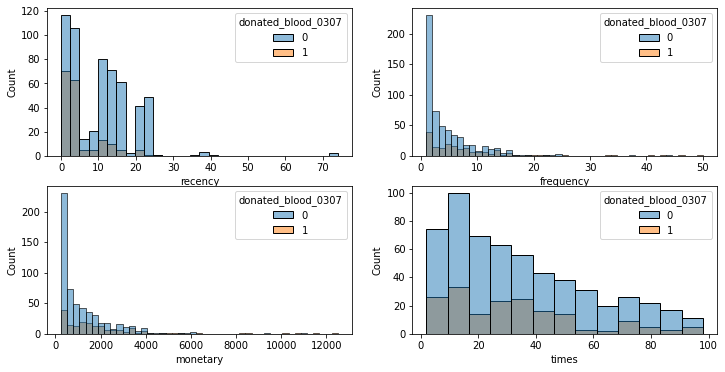

In [11]:
fig = plt.figure(figsize = (12,6))

plt.subplot(2,2,1)
sns.histplot(x = 'recency', hue = 'donated_blood_0307',data = df)

plt.subplot(2,2,2)
sns.histplot(x = 'frequency',hue = 'donated_blood_0307',data = df)

plt.subplot(2,2,3)
sns.histplot(x = 'monetary',hue = 'donated_blood_0307',data = df)

plt.subplot(2,2,4)
sns.histplot(x = 'times',hue = 'donated_blood_0307',data = df)

<AxesSubplot:xlabel='times'>

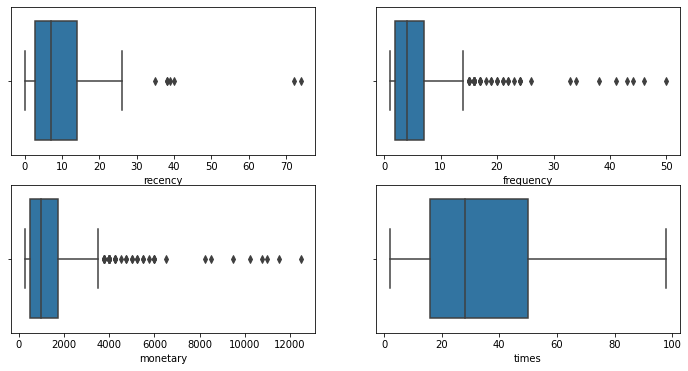

In [12]:
fig = plt.figure(figsize = (12,6))

plt.subplot(2,2,1)
sns.boxplot(x = 'recency',data = df)

plt.subplot(2,2,2)
sns.boxplot(x = 'frequency',data = df)

plt.subplot(2,2,3)
sns.boxplot(x = 'monetary',data = df)

plt.subplot(2,2,4)
sns.boxplot(x = 'times',data = df)

In [13]:
df['donated_blood_0307'] = df['donated_blood_0307'].astype(object)

In [14]:
df.dtypes

recency                int64
frequency              int64
monetary               int64
times                  int64
donated_blood_0307    object
dtype: object

In [15]:
df

,recency,frequency,monetary,times,donated_blood_0307
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
...,...,...,...,...,...
743,23,2,500,38,0
744,21,2,500,52,0
745,23,3,750,62,0
746,39,1,250,39,0


In [16]:
df['donated_blood_0307'].value_counts()

0    570
1    178
Name: donated_blood_0307, dtype: int64

# Step 5: Prepare the Data
- Deal with the data as required by the modelling technique
    - **Outliers** (remove or adjust if possible or necessary)
    - **Null** (remove or interpolate if possible or necessary)
    - **Missing Values** (remove or interpolate if possible or necessary)
    - **Coded content** (transform if possible or necessary [str to number or vice-versa])
    - **Normalisation** (if possible or necessary)
    - **Feature Engeneer** (if useful or necessary)

In [17]:
# Filter/subset/clean the data according to your EDA findings
df[df['recency'] > 30].count()

recency               7
frequency             7
monetary              7
times                 7
donated_blood_0307    7
dtype: int64

In [18]:
df[df['frequency'] > 13].count()

recency               58
frequency             58
monetary              58
times                 58
donated_blood_0307    58
dtype: int64

In [19]:
df[df['monetary'] > 3500].count()

recency               45
frequency             45
monetary              45
times                 45
donated_blood_0307    45
dtype: int64

In [20]:
df_new = df[(df['monetary']<3500) & (df['frequency'] < 13) & (df['recency']<30)]

In [21]:
X = df_new.drop(columns = ['donated_blood_0307'])
y = df_new['donated_blood_0307']

In [22]:
features = X.columns

scaler = StandardScaler()
scaled_df = scaler.fit_transform(X)

normalized_df = normalize(scaled_df)

X = pd.DataFrame(normalized_df, columns = features)

# Step 6: Modelling
Refer to the Problem and Main Question.
- What are the input variables (features)?
- Is there an output variable (label)?
- If there is an output variable:
    - What is it?
    - What is its type?
- What type of Modelling is it?
    - [ ] Supervised
    - [ ] Unsupervised 
- What type of Modelling is it?
    - [ ] Regression
    - [ ] Classification (binary) 
    - [ ] Classification (multi-class)
    - [ ] Clustering

# Step 7: Split the Data

Need to check for **Supervised** modelling:
- Number of known cases or observations
- Define the split in Training/Test or Training/Validation/Test and their proportions
- Check for unbalanced classes and how to keep or avoid it when spliting

In [23]:
X.shape

(674, 4)

In [24]:
y = y.astype('int')

In [25]:
y.value_counts()

0    525
1    149
Name: donated_blood_0307, dtype: int64

In [26]:
# Split your data
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state =42)

# Step 8: Define a Model

Define the model and its hyper-parameters.

Consider the parameters and hyper-parameters of each model at each (re)run and after checking the efficiency of a model against the training and test datasets.

In [27]:
#Choosing parameters

#Criterion
criterion = "entropy"

splitter = 'random'

max_depth = None

min_samples_split = 26

min_samples_leaf = 1

random_state = 42 

In [28]:
# Choose a model or models
dt = DecisionTreeClassifier(criterion = criterion, splitter = splitter,max_depth = max_depth,min_samples_split = min_samples_split,min_samples_leaf = min_samples_leaf,random_state = 42)

# Step 9: Fit the Model

In [29]:
# Fit model
dt.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_split=26,
                       random_state=42, splitter='random')

# Step 10: Verify and Evaluate the Training Model
- Use the **training** data to make predictions
- Check for overfitting
- What metrics are appropriate for the modelling approach used
- For **Supervised** models:
    - Check the **Training Results** with the **Training Predictions** during development
- Analyse, modify the parameters and hyper-parameters and repeat (within reason) until the model does not improve

In [30]:
# Evaluate model against training set
dt.score(X_train,y_train)

y_tpred = dt.predict(X_train)

print(f'The accuracy score is {dt.score(X_train,y_train)}')

The accuracy score is 0.8144712430426716


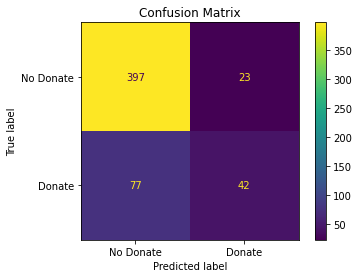

In [31]:
class_names = ['No Donate','Donate']
plot_confusion_matrix(dt,X_train,y_train, normalize = None, display_labels = class_names)
plt.title('Confusion Matrix')
plt.show()

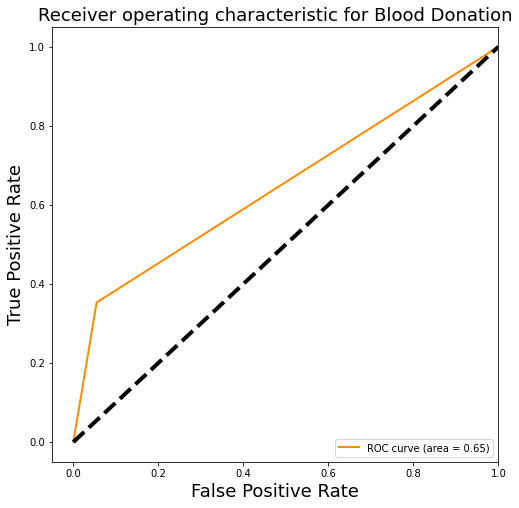

In [32]:
fpr, tpr, _ = roc_curve(y_train, y_tpred)

# Find auc
roc_auc = auc(fpr, tpr)

# Plot of a ROC curve for class 1 (has_cancer)
plt.figure(figsize=[8,8])

# Plot fpr, tpr
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver operating characteristic for Blood Donation', fontsize=18)
plt.legend(loc="lower right")
plt.show()

# Step 11: Make Predictions and Evaluate the Test Model
**NOTE**: **Do this only after not making any more improvements in the model**.

- Use the **test** data to make predictions
- For **Supervised** models:
    - Check the **Test Results** with the **Test Predictions**

In [33]:
# Evaluate model against test set
y_pred = dt.predict(X_test)
dt.score(X_test,y_test)

0.8222222222222222

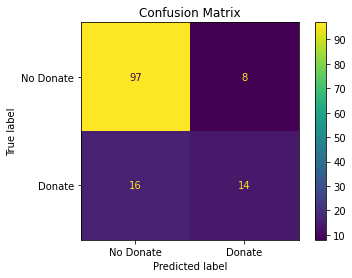

In [34]:
class_names = ['No Donate','Donate']
plot_confusion_matrix(dt,X_test,y_test, normalize = None, display_labels = class_names)
plt.title('Confusion Matrix')
plt.show()

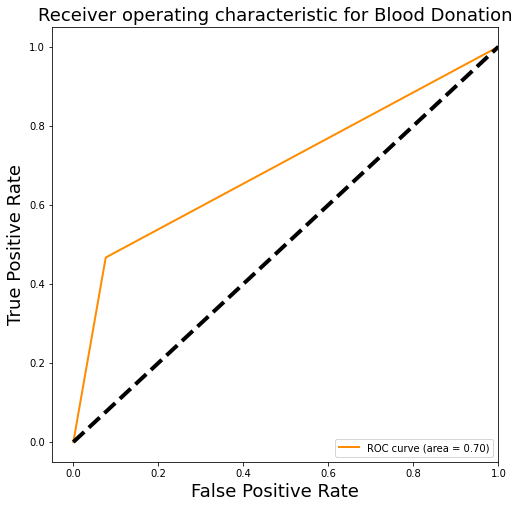

In [35]:
fpr, tpr, _ = roc_curve(y_test, y_pred)

# Find auc
roc_auc = auc(fpr, tpr)

# Plot of a ROC curve for class 1 (has_cancer)
plt.figure(figsize=[8,8])

# Plot fpr, tpr
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver operating characteristic for Blood Donation', fontsize=18)
plt.legend(loc="lower right")
plt.show()

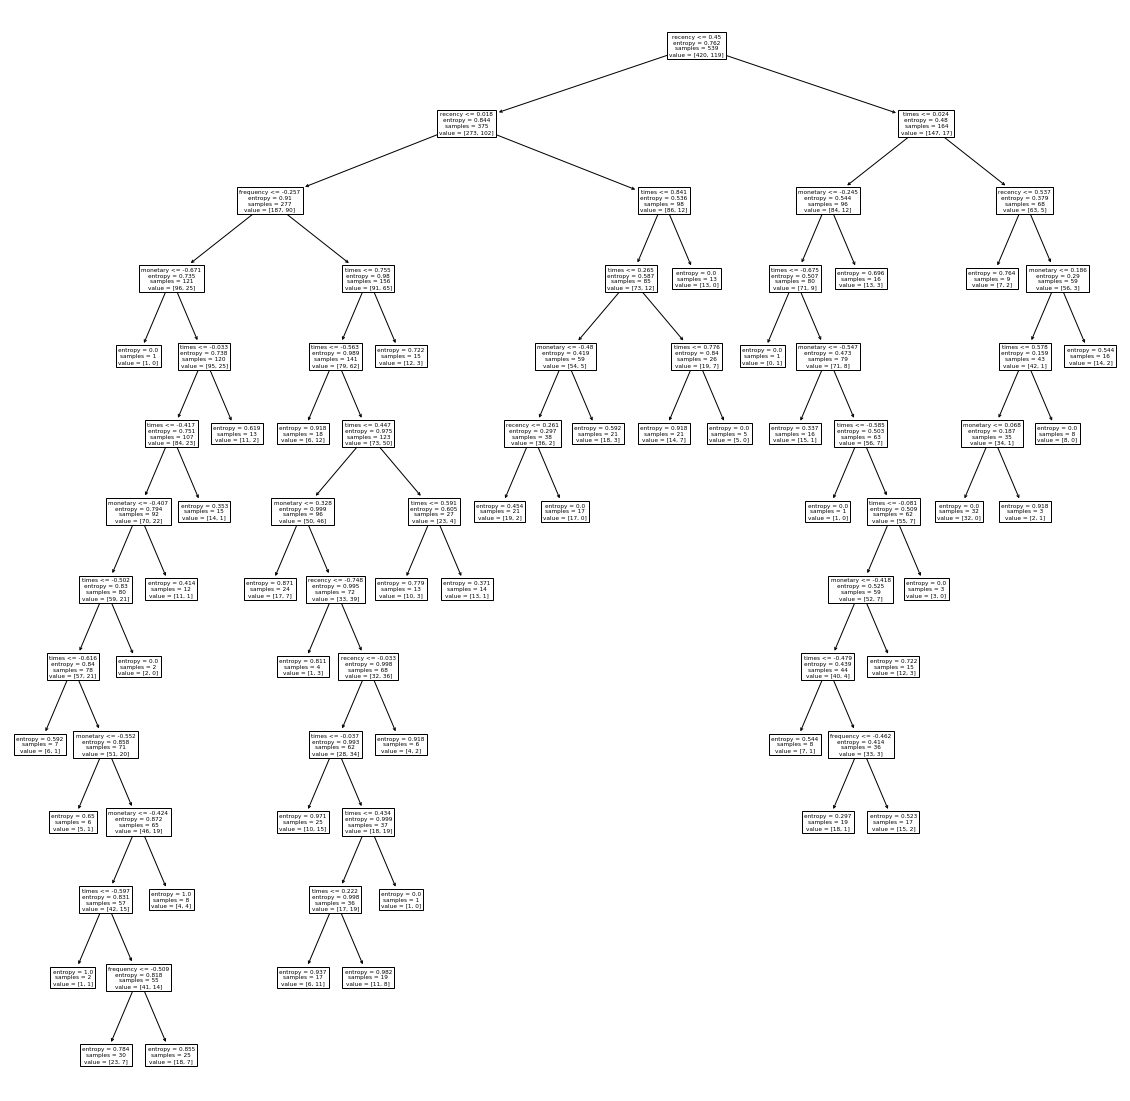

In [36]:
plt.figure(figsize= (20,20))
tree.plot_tree(dt, feature_names = X.columns)
plt.show()

# Step 12: Solve the Problem or Answer the Question
The results of an analysis or modelling can be used:
- As part of a product or process, so the model can make predictions when new input data is available
- As part of a report including text and charts to help understand the problem
- As input for further questions

In [37]:
report = classification_report(y_test,y_pred)

print(report)

              precision    recall  f1-score   support

           0       0.86      0.92      0.89       105
           1       0.64      0.47      0.54        30

    accuracy                           0.82       135
   macro avg       0.75      0.70      0.71       135
weighted avg       0.81      0.82      0.81       135



/Users/JohanNg/miniconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/JohanNg/miniconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/JohanNg/miniconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or mi

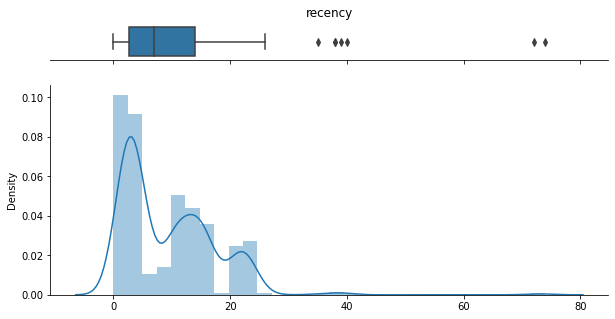

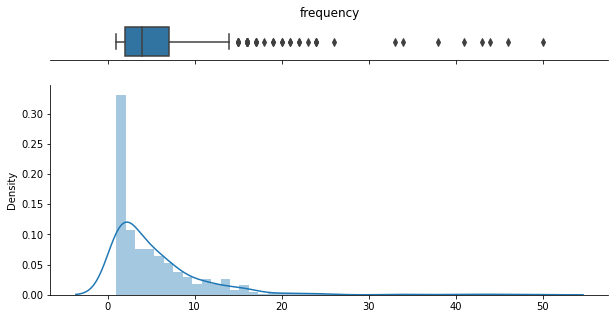

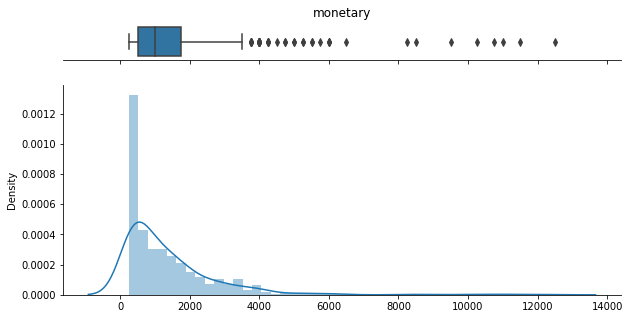

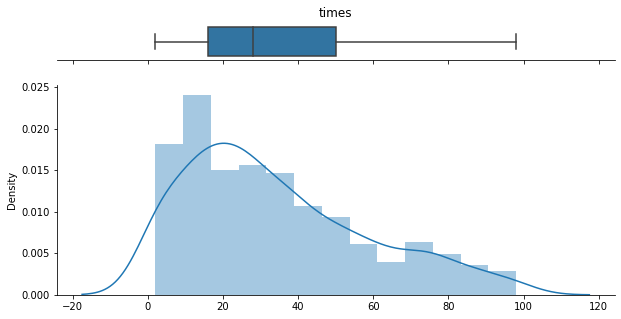

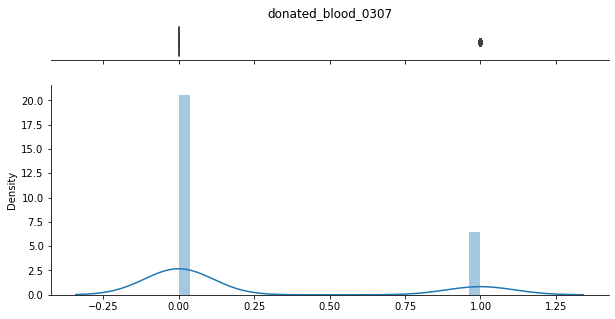

In [38]:
# Check for Outliers
for c in df.columns:
    fig, ax = plt.subplots(2,
                           figsize=(10, 5),
                           sharex=True,
                           gridspec_kw={'height_ratios': (0.15, 0.85)})

    ax_box = ax[0]
    ax_box = sns.boxplot(df[c], ax=ax_box)
    ax_box.set(title=c, yticks=[], xlabel='')
    sns.despine(ax=ax_box, left=True)

    ax_hist = ax[1]
    ax_hist = sns.distplot(df[c], ax=ax_hist)
    ax_hist.set(xlabel='')
    sns.despine(ax=ax_hist)

plt.show()

In [39]:
X = df.drop(columns = ['donated_blood_0307'])
y = df['donated_blood_0307']

In [40]:
y = y.astype('int')

In [41]:
features = X.columns

scaler = StandardScaler()
scaled_df = scaler.fit_transform(X)

normalized_df = normalize(scaled_df)

X = pd.DataFrame(normalized_df, columns = features)

In [42]:
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state =42)

In [62]:
np.arange(10,30)

array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29])

In [65]:
from sklearn.model_selection import GridSearchCV

#Setting Parameters
params = {'criterion':['gini','entropy'],'splitter':['best','random'], 'max_depth': np.arange(1,10) ,'min_samples_split':np.arange(10,30)}

dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)


DecisionTreeClassifier()

In [66]:
grid = GridSearchCV(dt,params)
grid.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_split': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29]),
                         'splitter': ['best', 'random']})

In [67]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'min_samples_split': 23,
 'splitter': 'random'}

In [68]:
grid.best_estimator_

DecisionTreeClassifier(max_depth=4, min_samples_split=23, splitter='random')

In [69]:
grid.best_score_

0.7960084033613445

In [70]:
grid.fit(X_test,y_test)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_split': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29]),
                         'splitter': ['best', 'random']})

In [71]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'min_samples_split': 28,
 'splitter': 'random'}

In [72]:
grid.best_score_

0.8



---



---



> > > > > > > > > © 2021 Institute of Data


---



---



